# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we'll examine a dataset of roughly 10,000 movies for review trends and insights that will help us make better recommendations or predictions. We'll be utilizing Pandas, Numpy, and Matplotlib, which are all basic Python analytical packages (Seaborne).

### Dataset Description 

I will be using the [TMDB Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). This data set originally consists of 10866 rows and 21 colums. 

The columns of the dataset are id,	imdb_id,	popularity,	budget,	revenue,	original_title,	cast,	homepage,	director,	tagline, overview,	runtime,	genres,	production_companies,	release_date,	vote_count,	vote_average,	release_year,	budget_adj, and	revenue_adj. The different columns all give us a different aspect of the data set, 10that consists of 10866 entries.

The column names all have different significance in our case study this will all be vivid in the deducting of insights from the data were the different coumns will all play a different role.  


### Question(s) for Analysis
>How does the overall allocated budget on a movie affect its popularity? Do movies with high budget plans become more popular? Or the Low and Medium budgeted movie take a win?  

> How does the Runtime of the movie affect its revenue gained? Does the runtime also affect the the popularity of the movie? 


In [15]:
# Importing of all the important libraries for use in the project

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Every bit of the data cleaning process will be **documented in mark-down cells precisely and all cleaning desicions justified**


In [16]:
# Loading the data set 
df = pd.read_csv('tmdb-movies.csv')

In [17]:
# Displaying the top 5 records of the data set just to try and understand it even more
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
# Printing out more information about the data set to get and understand it more
df.info(),
print('-------------')
print('Dataframe contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [19]:
# Getting to know the data types of the different columns of the data set
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [20]:
# Geatting to know the number of rows and columns in the data set
df.shape

(10866, 21)

In [21]:
# Getting to know the sum of the unique attributes of each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [22]:
# The summ of null values of each column in the data set
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [23]:
# Viewing the null values but returning a boolean this ti
df.isnull()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# Number of Dupicates in the Data set
df.duplicated().sum()

1


### Data Cleaning

> Following the robust data wrangling process we are now going to clean the data , giving appropriate reasons for the actions taken, using the most efficent methods possible 

Firstly we are going to drop the duplicate from the Dataset


In [26]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

From the Data Wrangling we noticed that there are some null values in the dataset. In the cell below we will working on thet

In [27]:
df = df[pd.notnull(df['cast'])]
df = df[pd.notnull(df['director'])]
df = df[pd.notnull(df['genres'])] 
df['production_companies'].fillna('missing',inplace=True) #object datatype
df['tagline'].fillna('missing',inplace=True)
df['budget'].replace(0,np.nan,inplace=True)
df['revenue'].replace(0,np.nan,inplace=True)
df['runtime'].replace(0,np.nan,inplace=True)

Printing the head of the data to see if the changes we have made have appeared

In [28]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We have performed some data cleaning above, however I noticed that there might be some double entries in some columns. 
Next, I will use masks (or queries) to have a deeper look, if some double entries are in specific columns

In [29]:
df['original_title'].value_counts().head()

Hamlet                  4
Julia                   3
Life                    3
A Christmas Carol       3
Beauty and the Beast    3
Name: original_title, dtype: int64

Since the value_counts() in the title column shows that there may be double entries of movie names, a function "look_into_title" is defined below to have a deeper look in the rows with same movie title.

In [30]:
# Checking column for dubplicated original_title entries

limit_4_title = df['original_title'].value_counts().index.tolist()
limit_4_title = limit_4_title[:4]
limit_4_title

limit_4_id = df['original_title'].value_counts().index.tolist()

def look_into_title(names):
    for limit in limit_4_title:
        df_title = df[df['original_title'] == limit]
        print(df_title.iloc[:,:5])
        print("---------------------------------------------------------------------")
        
look_into_title(limit_4_title)

          id    imdb_id  popularity     budget     revenue
1890   28238  tt1449175    0.086490        NaN         NaN
8573   10549  tt0116477    0.383469        NaN         NaN
8797   10688  tt0171359    0.277798  2000000.0   1568749.0
10106  10264  tt0099726    0.067973        NaN  20710451.0
---------------------------------------------------------------------
          id    imdb_id  popularity     budget    revenue
1156  278632  tt2582426    0.240776        NaN     2710.0
1349   42222  tt0076245    0.398651        NaN        NaN
3272    7351  tt0903627    0.281186  6000000.0  1300000.0
---------------------------------------------------------------------
          id    imdb_id  popularity      budget     revenue
234   300153  tt2948840    0.560423  12000000.0         NaN
1865  220903  tt1533395    0.102223         NaN         NaN
2513    6522  tt0123964    0.383326  80000000.0  73345029.0
---------------------------------------------------------------------
         id    imdb_id 

The results above show that despite having a same movie title, the movies differ in other columns. Hence, this implies that there are movies with the same title but different content. Therefore, no need to drop any rows.

<a id='eda'></a>
## Exploratory Data Analysis


### Movie popularity and the budget

Here we shall try to see, how does the overall allocated budget on a movie affect its popularity? Do movies with high budget plans become more popular? Or the Low and Medium budgeted movie take a win?

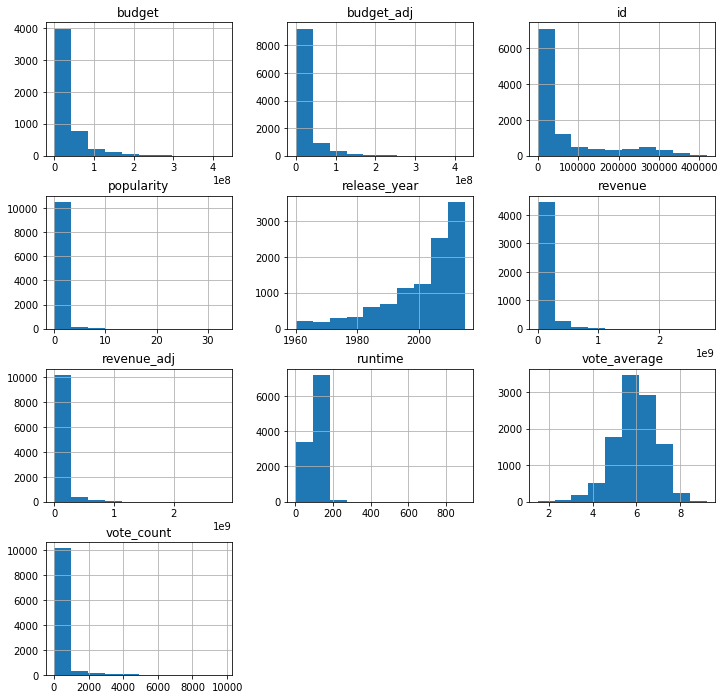

In [31]:
# Getting a hang of the data and understanding it even more 
df.hist(figsize=(12,12));

Text(0,0.5,'Popularity')

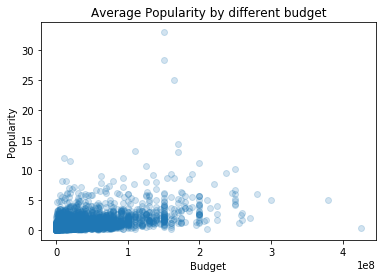

In [32]:
x = df['budget']
y = df['popularity']

plt.scatter(x,y,alpha=0.2)
plt.title('Average Popularity by different budget')
plt.xlabel('Budget')
plt.ylabel('Popularity')

In [33]:
m = df['budget'].median()
low_budget = df.query('budget < {}'.format(m))
high_budget = df.query('budget >= {}'.format(m))
mean_low_budget = low_budget['popularity'].mean()
mean_high_budget = high_budget['popularity'].mean()

Text(0,0.5,'Average Popularity')

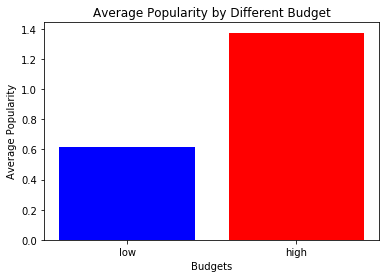

In [34]:
x = [1,2]
y = [mean_low_budget,mean_high_budget]
labels = ['low','high']
plt.bar(x, y, tick_label=labels,color=['b','r'])
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')

From the above bar graph we can clearly see that thetruly the higher the budge the popular the movie compared to the low budget. 
This is probably due to the quality and other features that greatly shift when tere is enough cash for the movie filming

In [35]:
gain = (mean_high_budget-mean_low_budget)/mean_high_budget*100
gain

55.356675476471061

From the above cell we can also see that the mean gain for the Highly budgeted movie is past half that is 55.3. 

### Runtime and Movie Popularity

We Shall start by quqerying the specific runtimes and creating data frames from them to get to work and manipulate the data more easily

In [36]:
short_m = df.query('runtime <= {}'.format(60))
medium_m = df.query('runtime <= {}'.format(120))
long_m = df.query('runtime > {}'.format(120))
mean_short_m = short_m['popularity'].mean()
mean_medium_m = medium_m['popularity'].mean()
mean_long_m = long_m['popularity'].mean()


Will then plot a bar graph to see if ur hypothesis will be true and answer our question using the plots.
This will be made possible by the newly created data frames above 

Text(0,0.5,'Average Popularity')

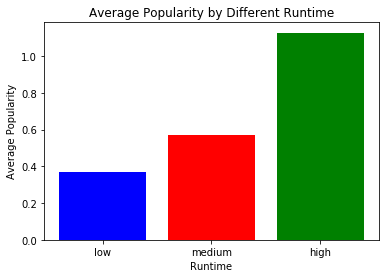

In [37]:
x = [1,2,3]
y = [mean_short_m, mean_medium_m, mean_long_m]
labels=['low','medium','high']
plt.bar(x, y, tick_label = labels, color=['b','r','g'])
plt.title('Average Popularity by Different Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')

Above we can note that the higher the runtime the more the popularity of the movie. This seemingly proposes that most people preffer longer movies than movies with a  shoter duration. 

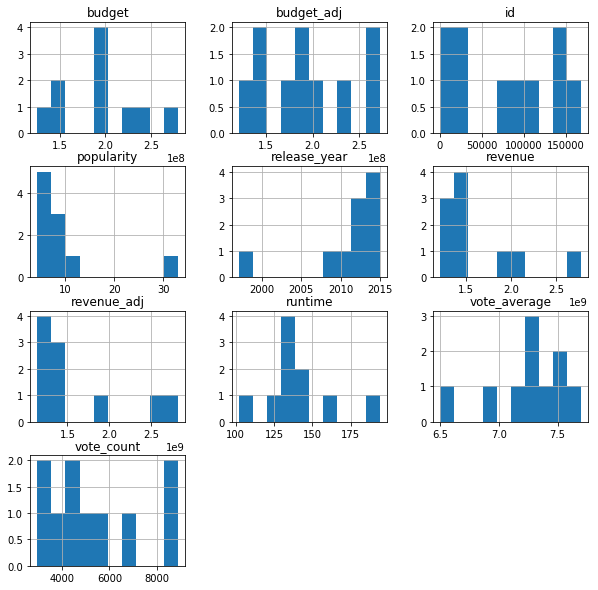

In [38]:
top10_rev = df.nlargest(10,'revenue')
top10_rev.hist(figsize=(10,10));

Above we can also get to see and view the concept in a more general way to clear doubts of any biasness or irregurality

In [39]:
df['genres']

0              Action|Adventure|Science Fiction|Thriller
1              Action|Adventure|Science Fiction|Thriller
2                     Adventure|Science Fiction|Thriller
3               Action|Adventure|Science Fiction|Fantasy
4                                  Action|Crime|Thriller
5                       Western|Drama|Adventure|Thriller
6              Science Fiction|Action|Thriller|Adventure
7                        Drama|Adventure|Science Fiction
8                      Family|Animation|Adventure|Comedy
9                                Comedy|Animation|Family
10                                Action|Adventure|Crime
11              Science Fiction|Fantasy|Action|Adventure
12                                 Drama|Science Fiction
13                         Action|Comedy|Science Fiction
14                      Action|Adventure|Science Fiction
15                           Crime|Drama|Mystery|Western
16                                 Crime|Action|Thriller
17                      Science

In [40]:
data = pd.Series(df['genres'].str.cat(sep='|').split('|'))
count = data.value_counts(ascending=False)
df_genre_counts = pd.DataFrame({'genres':count.index, 'count':count.values})

In [41]:
df_genre_counts

,genres,count
0,Drama,4746
1,Comedy,3775
2,Thriller,2902
3,Action,2376
4,Romance,1708
5,Horror,1636
6,Adventure,1465
7,Crime,1353
8,Science Fiction,1221
9,Family,1214


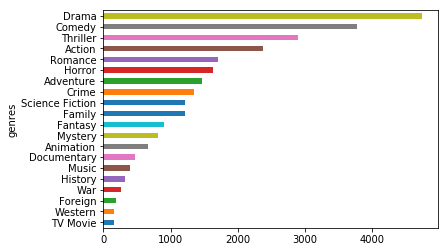

In [42]:
x = df_genre_counts.groupby('genres')['count'].mean().sort_values()
x.plot(kind='barh');

Above we can also get to see that the most polular genre is Drama

<a id='conclusions'></a>
## Conclusions

> From the Data Analysis above we were able to have questions answred. For the first case we were indeed able to see  that the higher the budget for the movie the more popular the movie and some of the reasons for this were also deduced. One being that probably the quality of movies was better with a higher budget

> We were also able to see in our second question that indeed yes the longer the runtime the more the revenue from the song since they are loved by many. in this were also able to give reason by the plotting of bar graphs showing that its mostly younger population watching. Here we were also able to remove biasness since we were able to see that the most liked movie genre is Drama removing the doubts.

> One of the shortcommings or challlenges faced is that when filling the null values i used the replaced method, which might not be the best way to do so. Also the duplicate coud have been better handed compared to just being dropped.


In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0